In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dl_toolbox.transforms as transforms
from dl_toolbox.datasets import DatasetFlair2

In [2]:
image_path='/work/AI4GEO/users/fournip/FLAIR_1/train/D004_2021/Z10_AU/img/IMG_000826.tif'
label_path='/work/AI4GEO/users/fournip/FLAIR_1/train/D004_2021/Z10_AU/msk/MSK_000826.tif'

#dict_files = {
#    'IMG' : [
#        '/data/toy_dataset_flair-one/train/D004_2021/Z10_AU/img/IMG_000925.tif',
#        '/data/toy_dataset_flair-one/train/D006_2020/Z2_NN/img/IMG_001981.tif'
#    ],
#    'MSK' : [
#        '/data/toy_dataset_flair-one/train/D004_2021/Z10_AU/msk/MSK_000925.tif',
#        '/data/toy_dataset_flair-one/train/D006_2020/Z2_NN/msk/MSK_001981.tif'
#    ]
#}
        
dataset = DatasetFlair2(
    imgs=[image_path],
    msks=[label_path],
    bands=[1,2,3],
    merge='hierarchical6',
    crop_size=512,
    shuffle=False,
    transforms=transforms.Color(bounds=(0.7, 0.7)),
    crop_step=None
)

In [6]:
image=dataset[0]['image'].numpy().transpose(1,2,0)[...,:3]

In [7]:
np.max(image)

1.0

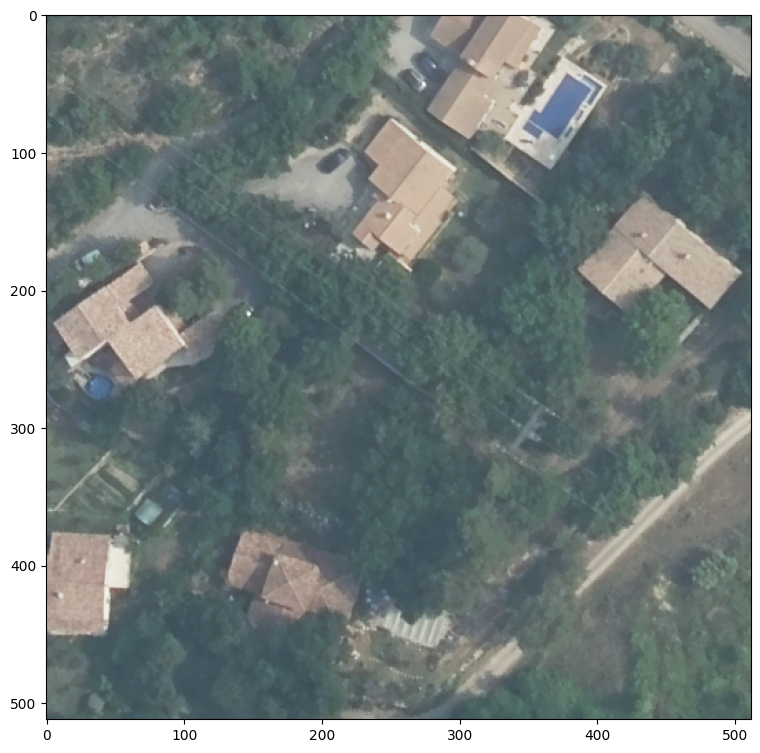

In [8]:
%matplotlib inline
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.imshow(image)

AttributeError: 'DigitanieV2' object has no attribute 'labels_to_rgb'

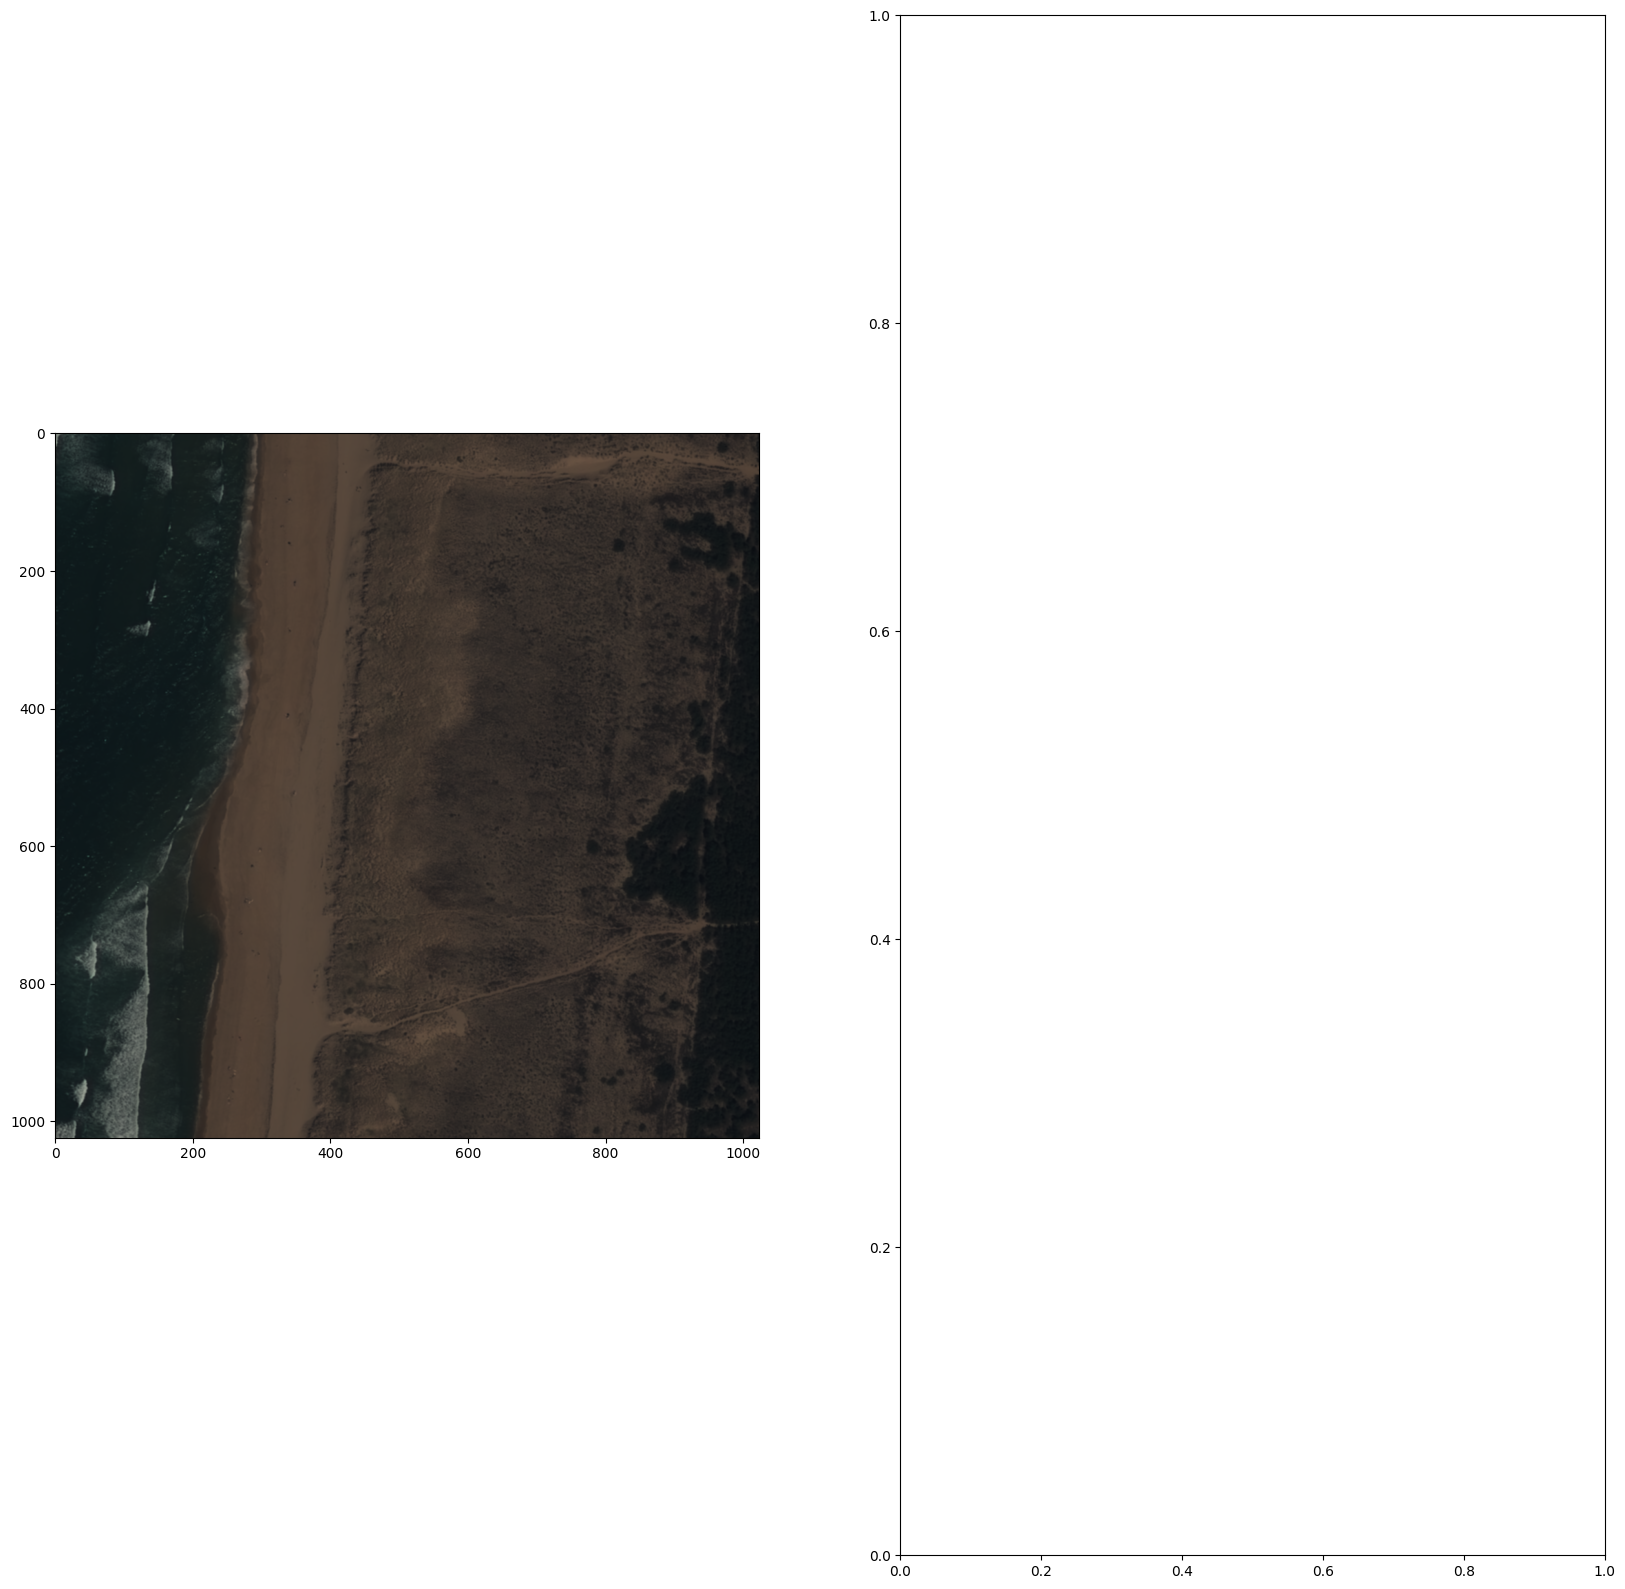

In [14]:
for batch in dataloader:
    img = batch['image'][0].numpy().transpose(1,2,0)[...,:3]
    # Contrast stretching
    #p2, p98 = np.percentile(img, (2, 98))
    #img = exposure.rescale_intensity(img, in_range=(p2, p98))

    labels = dataset[0]['label'].numpy()

    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(121)
    ax1.imshow(img)
    ax2 = fig.add_subplot(122)
    ax2.imshow(dataset.labels_to_rgb(labels))
    break

In [6]:
dataset = Subset(
    dataset=ResiscDs(
        data_path='/d/pfournie/ai4geo/data/NWPU-RESISC45',
        img_aug='d4'
    ),
    indices=[700*i+j for i in range(3,5) for j in range(8,50)]
)

Text(0.5, 1.0, '3')

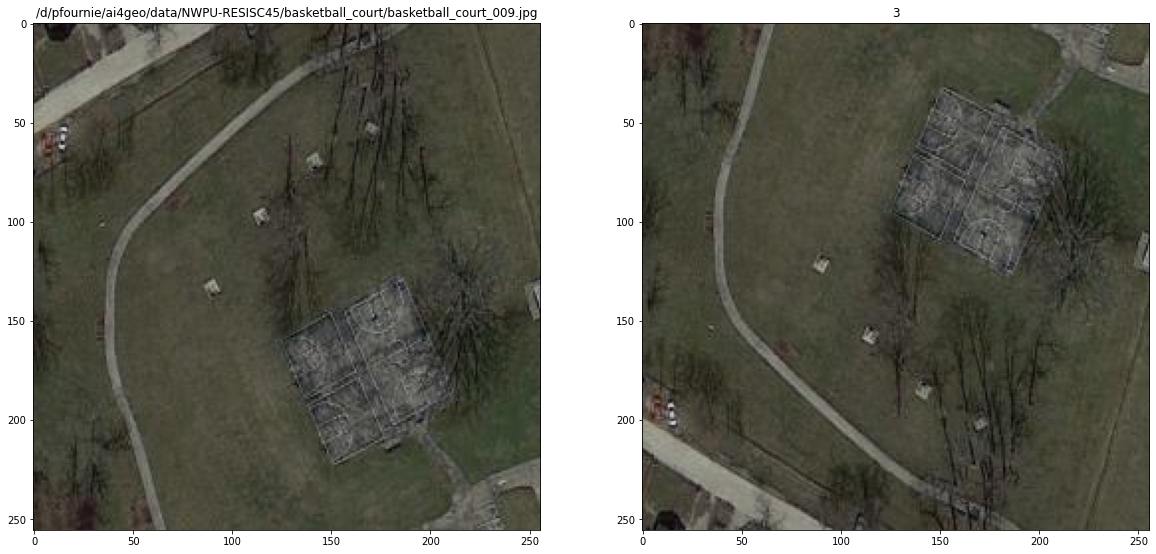

In [7]:
elem = dataset[0]
img = elem['image'].numpy().transpose(1,2,0)
orig_img = elem['orig_image'].numpy().transpose(1,2,0)

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(orig_img)
ax[1].imshow(img)
ax[0].set_title(elem['path'])
ax[1].set_title(int(elem['mask']))